![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# FINAL PROJECT
### Course : Data Science Foundations
### Instructor : Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> 
### Assignment submitted by : Anti Antono <anti.antono@bts.tech> 

### Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/antiantono/bts-dsf-anti/tree/main/assignments/DSF_FINAL_PROJECT_AA.ipynb)

# The Assignment

The final project for the class will need to draw from everything you have covered in class, at least everything relevant for your final project. For that you will need to choose a topic. You will be using **the image and text** datasets that we have seen on our sessions. 

It doesn't need to be a super revolutionary idea, but at least have in mind the issue of reducing the time between information and action. And you will need to send it to me. 

The project will need to contain the following steps:

1. Ingesting, exploring and cleaning data for your project
2. Choosing/testing of algorithm approach
3. Visualizing the results
4. Packaging the project into a product

You will be using code from class to support you on the second, third and forth parts of the project. 

I am not looking for excellence, and I do not mind that you copy/paste code, but always try to understand why. 

# About This Project
**The objective** : to help marketers of alcoholic beverage brands create better marketing messages, by understanding what product characteristics drive purchase.

**The solution** : a tool that indicates whether a product description is likely to generate purchase or not.

**Dataset** : [Beer, liquor and wine reviews](https://www.kaggle.com/datafiniti/wine-beer-and-liquor-reviews) on Kaggle, featuring product reviews given on various US retailer websites (e.g. Amazon, Walmart, Target). More info is available from the data provider [here.](https://developer.datafiniti.co/docs/product-data-schema)



In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

#0 Data Cleaning
*Note1 : despite its title "Beer, liquor and wine reviews", the data actually includes other product types. To avoid losing too much data, I decided to keep all food and beverage cases, under the hypothesis that they may share similar product attributes e.g. flavour mentions.* 

*Note2 : the category variable is so messy! I decided to manually add the product type variable manually to the csv file, which didn't take long as the sample data is fairly small and I have domain knowledge on the US market and beverage category.*


**Tasks in this section: preprocessing and checks**
* Load raw data in full 
* Remove cases in the wrong category (not food/bev) + tidy up
* First checks on variables to use as target
* Save clean, relevant data for modeling

## 0.1 Raw data

In [7]:
# Load raw data in full 
raw = pd.read_csv('https://raw.githubusercontent.com/antiantono/bts-dsf-anti/main/data/reviews.csv')
raw.columns

Index(['id', 'asins', 'brand', 'categories', 'prod_type', 'dateAdded',
       'dateUpdated', 'descriptions', 'dimension', 'ean', 'flavors', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'sourceURLs', 'upc', 'weight'],
      dtype='object')

In [ ]:
# Check categories --> we'll drop more than a third of the data ('Other' category i.e. not food or beverage)
print("PRODUCT TYPE COUNTS (n)\n", "All Categories       ", len(raw), 
      "\n", raw.prod_type.value_counts())

PRODUCT TYPE COUNTS (n)
 All Categories        2890 
 Other                 1052
Mixer_Cocktail_FAB     547
Wine                   521
Spirits                344
Food                   214
Beer_Malt              136
Non Alc Bev             76
Name: prod_type, dtype: int64


## 0.2 Data selection

In [ ]:
# Now we'll prepare a clean dataset for anaysis
clean = raw.copy()

In [ ]:
# Remove 'Other' (not food or beverage)
clean = clean[clean.prod_type != 'Other']
clean.prod_type.value_counts()

Mixer_Cocktail_FAB    547
Wine                  521
Spirits               344
Food                  214
Beer_Malt             136
Non Alc Bev            76
Name: prod_type, dtype: int64

In [ ]:
# Create new variable for product category
clean['prod_cat'] = clean['prod_type']
clean.prod_cat = np.where(np.logical_or(clean.prod_type == 'Food', clean.prod_type == 'Non Alc Bev'), clean.prod_type, 'Alc Bev')
pd.crosstab(clean.prod_type, clean.prod_cat)

prod_cat,Alc Bev,Food,Non Alc Bev
prod_type,,,
Beer_Malt,136,0,0
Food,0,214,0
Mixer_Cocktail_FAB,547,0,0
Non Alc Bev,0,0,76
Spirits,344,0,0
Wine,521,0,0


In [ ]:
# Keep only relevant columns and reorder
clean = clean[['name', 'brand', 'prod_type', 'prod_cat',  
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.text', 'reviews.title']]

In [ ]:
# Rename columns
clean.columns = ['name', 'brand', 'prod_type', 'prod_cat',  
       'purchased', 'recommend', 'num_helpful', 'rating',
       'reviews_text', 'reviews_title']

## 0.3 Data checks

### Quick view of selected data

In [ ]:
# Check content of clean raw data
clean.head(3).T
print("")
clean.describe().T
print("")
clean.describe(exclude= np.number).T

,0,1,2
name,Ecco Domani174 Pinot Grigio - 750ml Bottle,Fresh Craft174 Mango Citrus - 4pk / 250ml Bottle,1000 Stories174 Zinfandel - 750ml Bottle
brand,Gallo,Fresh Craft Co.,1000 Stories
prod_type,Wine,Beer_Malt,Wine
prod_cat,Alc Bev,Alc Bev,Alc Bev
purchased,NaN,NaN,NaN
recommend,True,True,True
num_helpful,1,NaN,NaN
rating,5,5,5
reviews_text,This a fantastic white wine for any occasion!,"Tart, not sweet...very refreshing and delicious!",I was given this wine so it was a delightful s...
reviews_title,My Favorite White Wine,Yum!!,A New Favorite!


,count,mean,std,min,25%,50%,75%,max
num_helpful,615.0,1.304065,2.927501,0.0,0.0,0.0,1.0,29.0
rating,1417.0,4.560339,1.003205,1.0,5.0,5.0,5.0,5.0


,count,unique,top,freq
name,1838,328,Bittermens Xocolatl Mole Cocktail Bitters - 5 oz,128
brand,1773,189,Master of Mixes,138
prod_type,1838,6,Mixer_Cocktail_FAB,547
prod_cat,1838,3,Alc Bev,1548
purchased,1002,2,False,684
recommend,898,2,True,826
reviews_text,1837,1507,Best bourbon I have found...have toured distil...,7
reviews_title,1795,1269,Five Stars,66


### Check target variables
"Outcome" variables as candidates for machine learning targets: 
* product rating
* whether consumers recommend the product 
* whether consumers purchase the product 

In [ ]:
# Candidates for target variables
targets = clean[['prod_type', 'prod_cat', 'rating', 'recommend', 'purchased']]
targets.head()

,prod_type,prod_cat,rating,recommend,purchased
0,Wine,Alc Bev,5.0,True,NaN
1,Beer_Malt,Alc Bev,5.0,True,NaN
2,Wine,Alc Bev,5.0,True,NaN
3,Wine,Alc Bev,5.0,True,NaN
4,Wine,Alc Bev,5.0,True,NaN


In [ ]:
# Check number of available data points for modeling
# Most promising : ratings, purchased (fewer NAs)
print("NOT NA")
for column in targets.columns:
  print(column, ": ", len(targets) - targets[column].isna().sum())

NOT NA
prod_type :  1838
prod_cat :  1838
rating :  1417
recommend :  898
purchased :  1002


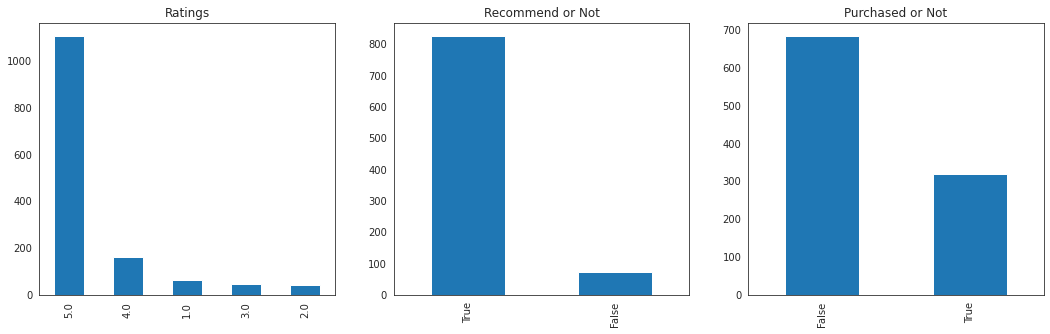

In [ ]:
# Check class balance 
# Purchase is better balanced
_= plt.subplots(1, 3, figsize=(18,5))

_= plt.subplot(131)
_= targets.rating.value_counts().plot.bar(title='Ratings')

_= plt.subplot(132)
_= targets.recommend.value_counts().plot.bar(title='Recommend or Not')

_= plt.subplot(133)
_= targets.purchased.value_counts().plot.bar(title='Purchased or Not')

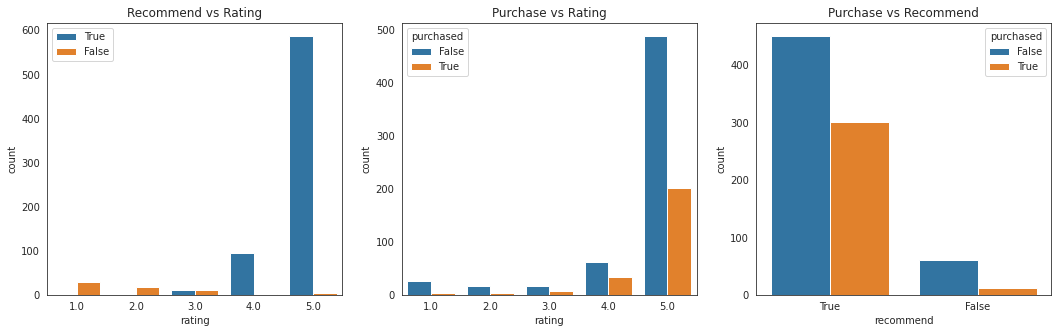

In [ ]:
# Sense check : relationship among ratings vs recommend vs. purchase 
# to see whether it's reasonable to use review data (asssumed to correspond with ratings) to predict recommendation or purchase

_= plt.subplots(1, 3, figsize=(18,5))

_= plt.subplot(131)
_= plt.title('Recommend vs Rating')
_= sns.countplot(x=targets.rating, hue=targets.recommend)
_= plt.legend(loc='upper left')

_= plt.subplot(132)
_= plt.title('Purchase vs Rating')
_= sns.countplot(x=targets.rating, hue=targets.purchased)

_= plt.subplot(133)
_= plt.title('Purchase vs Recommend')
_= sns.countplot(x=targets.recommend, hue=targets.purchased)

In [ ]:
# Check case distribution among those recommend vs. not and those purchased vs. not
rat_rec = pd.crosstab(targets.rating, targets.recommend, margins=True)
rat_rec['perc_True'] = round(rat_rec[True] / rat_rec['All'], 2)

rat_pur = pd.crosstab(targets.rating, targets.purchased, margins=True)
rat_pur['perc_True'] = round(rat_pur[True] / rat_pur['All'], 2)

rec_pur = pd.crosstab(targets.recommend, targets.purchased, margins=True)
rec_pur['perc_True'] = round(rec_pur[True] / rec_pur['All'], 2)

rat_rec
rat_pur
rec_pur

recommend,False,True,All,perc_True
rating,,,,
1.0,28,0,28,0.00
2.0,18,0,18,0.00
3.0,10,11,21,0.52
4.0,1,94,95,0.99
5.0,5,587,592,0.99
All,62,692,754,0.92


purchased,False,True,All,perc_True
rating,,,,
1.0,26,3,29,0.10
2.0,17,3,20,0.15
3.0,16,7,23,0.30
4.0,62,33,95,0.35
5.0,489,202,691,0.29
All,610,248,858,0.29


purchased,False,True,All,perc_True
recommend,,,,
False,61,11,72,0.15
True,451,301,752,0.40
All,512,312,824,0.38


In [ ]:
# Significance check with chi-square
from scipy.stats import chi2_contingency

chisq, p1, dof, expected = chi2_contingency(pd.crosstab(targets.rating, targets.recommend))
chisq, p2, dof, expected = chi2_contingency(pd.crosstab(targets.rating, targets.purchased))
chisq, p3, dof, expected = chi2_contingency(pd.crosstab(targets.recommend, targets.purchased))

print("p-value rating x recommend:", p1)
print("p-value rating x purchased:", p2)
print("p-value recommend x purchased:", p3)

p-value rating x recommend: 8.676000122915464e-130
p-value rating x purchased: 0.07868113999525839
p-value recommend x purchased: 6.101841519377036e-05


#### *Comments on target variable*
Sense check findings:
* Strong association between ratings and recommendation (significant at 99% CL)
* Some association between ratings and purchase (significant at 90% CL)

Note: the majority of those who recommend the product (or give high rating scores) did not purchase product -- this may be because the site did not verify purchase. 

**Decision: use purchase as target variable**

Rationale :
* More data points vs. recommend
* More balanced (purchase:not ~ 1:2)
* Expected to correspond with reviews (90% sig association with ratings) 

## 0.4 Tidy up for modeling

In [ ]:
# Isolate the raw text : 
reviews = clean[['reviews_title', 'reviews_text']]
reviews.head()

,reviews_title,reviews_text
0,My Favorite White Wine,This a fantastic white wine for any occasion!
1,Yum!!,"Tart, not sweet...very refreshing and delicious!"
2,A New Favorite!,I was given this wine so it was a delightful s...
3,"Bold, Flavorful, Aromatic, Delicious",This is a phenomenal wine and my new favorite ...
4,"Yum! Plus, Environmentally Friendly!",4 750ml bottles for the price of two With way ...


In [ ]:
# Combine the review title and text 
reviews['reviews'] = reviews['reviews_title'] + str(" : ") + reviews['reviews_text']
reviews.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,reviews_title,reviews_text,reviews
0,My Favorite White Wine,This a fantastic white wine for any occasion!,My Favorite White Wine : This a fantastic whit...
1,Yum!!,"Tart, not sweet...very refreshing and delicious!","Yum!! : Tart, not sweet...very refreshing and ..."
2,A New Favorite!,I was given this wine so it was a delightful s...,A New Favorite! : I was given this wine so it ...
3,"Bold, Flavorful, Aromatic, Delicious",This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious : This is..."
4,"Yum! Plus, Environmentally Friendly!",4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly! : 4 750ml..."


In [ ]:
# Use the combined review columns for modeling
mydata = reviews.copy()
mydata = mydata.drop(axis=1, columns=['reviews_title', 'reviews_text'])

In [ ]:
# Add target variable
mydata['purchased'] = clean['purchased']
mydata.head()

,reviews,purchased
0,My Favorite White Wine : This a fantastic whit...,NaN
1,"Yum!! : Tart, not sweet...very refreshing and ...",NaN
2,A New Favorite! : I was given this wine so it ...,NaN
3,"Bold, Flavorful, Aromatic, Delicious : This is...",NaN
4,"Yum! Plus, Environmentally Friendly! : 4 750ml...",NaN


In [ ]:
# Check NA
mydata.isna().sum()

reviews       44
purchased    836
dtype: int64

In [ ]:
# Drop records without reviews
mydata = mydata[mydata.reviews.notna()]
len(mydata)

1794

In [ ]:
# Final check - note we still have NAs in 'purchased' but these can be used for prediction so they will be kept
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1794 entries, 0 to 2889
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reviews    1794 non-null   object
 1   purchased  995 non-null    object
dtypes: object(2)
memory usage: 42.0+ KB


In [ ]:
# Save clean and tidy data for modeling
mydata.to_csv('/content/drive/MyDrive/Data/mydata.csv')

#1 Data Preparation
**Tasks in this section:**
* Prepare training and test dataset 
* Address unbalanced classes in training dataset by resampling
* Inspect review text and create custom tokenizer
* Extract features with Scikit-Learn vectorizers

## 1.0 Get clean data

In [4]:
# Load clean data (already uploaded to Github)
import pandas as pd
mydata = pd.read_csv('https://raw.githubusercontent.com/antiantono/bts-dsf-anti/main/data/mydata.csv', index_col= 0)
mydata.head()

,reviews,purchased
0,My Favorite White Wine : This a fantastic whit...,NaN
1,"Yum!! : Tart, not sweet...very refreshing and ...",NaN
2,A New Favorite! : I was given this wine so it ...,NaN
3,"Bold, Flavorful, Aromatic, Delicious : This is...",NaN
4,"Yum! Plus, Environmentally Friendly! : 4 750ml...",NaN


## 1.1 Variables for modeling

In [ ]:
# Check split NA vs not NA 
print("Not NA :", mydata.purchased.notna().sum())
print("NA :", mydata.purchased.isna().sum())

Not NA : 995
NA : 799


In [5]:
# Split data for modeling (has target, will be split to train vs test) vs for prediction only (no target)
to_model = mydata[mydata.purchased.notna()]

to_predict = mydata[mydata.purchased.isna()]
to_predict.drop(columns = 'purchased', inplace=True)

to_model.info() 
to_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 67 to 2815
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reviews    995 non-null    object
 1   purchased  995 non-null    object
dtypes: object(2)
memory usage: 23.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 2889
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  799 non-null    object
dtypes: object(1)
memory usage: 12.5+ KB


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
# Variables for modeling
X = to_model.reviews
y = to_model.purchased.astype(int)

# Variables for new prediction
X_new = to_predict.reviews

## 1.2 Split and balance training set 

In [ ]:
# Check for class imbalance : we have more non-purchase (n=681) than purchase (n=314)
y.value_counts()

0    681
1    314
Name: purchased, dtype: int64

In [7]:
# Split into train vs test before balancing
# To avoid the possibility of the same data point appearing in both train and test 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [8]:
# Reconstruct training data 
to_train = pd.concat([X_train, y_train], axis=1)

# Split the classes
pur = to_train[to_train.purchased == True]
nopur = to_train[to_train.purchased == False]

# Check class sizes
to_train.purchased.value_counts()

0    549
1    247
Name: purchased, dtype: int64

In [9]:
# Boost/ upsample minority class (purchased) to match the majority class size (not purchased)
from sklearn.utils import resample
pur_boost = resample(pur, replace=True, n_samples=len(nopur), random_state=20)

print("No purchase, n=", len(nopur),
      "\nPurchased initial, n=", len(pur),
      "\nPurchased boosted, n=", len(pur_boost))

No purchase, n= 549 
Purchased initial, n= 247 
Purchased boosted, n= 549


In [10]:
# Reconstruct training data with boosted sample
to_train_boost = pd.concat([pur_boost, nopur])
to_train_boost.head(3)
to_train_boost.tail(3)
print("Boosted training set: n=", len(to_train_boost))

,reviews,purchased
469,Excellent : Not only is this item great for Bl...,1
1368,A very good flavor!! : Very good product! A li...,1
528,Clamato : I bought this for my 20 year old gra...,1


,reviews,purchased
456,Best bourbon under 50 : This is the best bourb...,0
713,Refreshing : I have had Stage 4 Kidney Cancer ...,0
543,Clamato : The Clamato Cocktail is the best jui...,0


Boosted training set: n= 1098


In [11]:
# Updated variables for modeling, based on boosted (balanced) training set
X_train_boost = to_train_boost.reviews
y_train_boost = to_train_boost.purchased

## 1.3 Text pre-processing

In [12]:
# Get spaCy 
import spacy
nlp = spacy.load('en')

### Inspect review text

In [13]:
# Tokenize text data
train_text = to_train_boost.reviews.tolist()
train_doc = nlp(str(train_text))

In [ ]:
len(train_doc)

39573

In [ ]:
# Collect tags
train_tags = []
for token in train_doc:
    train_tags.append({'LOWER_': token.lower_, 'LEMMA_': token.lemma_, 'POS_': token.pos_, 
              'IS_ALPHA': token.is_alpha, 'IS_STOP': token.is_stop, 'IS_PUNCT': token.is_punct})

# Convert tags into df
train_tags_df = pd.DataFrame(train_tags)
train_tags_df.head()

,LOWER_,LEMMA_,POS_,IS_ALPHA,IS_STOP,IS_PUNCT
0,[,[,PUNCT,False,False,True
1,"""","""",PUNCT,False,False,True
2,excellent,excellent,NOUN,True,False,False
3,:,:,PUNCT,False,False,True
4,not,not,PART,True,True,False


In [ ]:
# Get examples of text for each POS 
for POS in train_tags_df.POS_.unique():
  train_tags_df.loc[train_tags_df.POS_ == POS,['LOWER_', 'LEMMA_', 'POS_']].head()
  print("")

,LOWER_,LEMMA_,POS_
0,[,[,PUNCT
1,"""","""",PUNCT
3,:,:,PUNCT
14,",",",",PUNCT
21,!,!,PUNCT


,LOWER_,LEMMA_,POS_
2,excellent,excellent,NOUN
8,item,item,NOUN
28,flavor,flavor,NOUN
34,product,product,NOUN
41,price,price,NOUN


,LOWER_,LEMMA_,POS_
4,not,not,PART
13,'s,'s,PART
116,n't,not,PART
148,n't,not,PART
154,nt,not,PART


,LOWER_,LEMMA_,POS_
5,only,only,ADV
26,very,very,ADV
32,very,very,ADV
37,little,little,ADV
43,much,much,ADV


,LOWER_,LEMMA_,POS_
6,is,be,AUX
17,'s,be,AUX
89,is,be,AUX
98,is,be,AUX
125,has,have,AUX


,LOWER_,LEMMA_,POS_
7,this,this,DET
25,a,a,DET
36,a,a,DET
40,the,the,DET
47,the,the,DET


,LOWER_,LEMMA_,POS_
9,great,great,ADJ
18,super,super,ADJ
27,good,good,ADJ
33,good,good,ADJ
38,disappointed,disappointed,ADJ


,LOWER_,LEMMA_,POS_
10,for,for,ADP
19,for,for,ADP
39,in,in,ADP
46,in,in,ADP
58,for,for,ADP


,LOWER_,LEMMA_,POS_
11,bloody,Bloody,PROPN
12,mary,Mary,PROPN
20,chili,chili,PROPN
53,clamato,Clamato,PROPN
119,orange,orange,PROPN


,LOWER_,LEMMA_,POS_
15,but,but,CCONJ
68,and,and,CCONJ
79,and,and,CCONJ
96,and,and,CCONJ
129,and,and,CCONJ


,LOWER_,LEMMA_,POS_
16,it,-PRON-,PRON
55,i,-PRON-,PRON
65,he,-PRON-,PRON
67,it,-PRON-,PRON
70,it,-PRON-,PRON


,LOWER_,LEMMA_,POS_
45,than,than,SCONJ
157,as,as,SCONJ
174,as,as,SCONJ
199,that,that,SCONJ
236,than,than,SCONJ


,LOWER_,LEMMA_,POS_
56,bought,buy,VERB
66,loves,love,VERB
69,says,say,VERB
71,taste,taste,VERB
80,tastes,taste,VERB


,LOWER_,LEMMA_,POS_
60,20,20,NUM
102,two,two,NUM
204,10,10,NUM
306,one,one,NUM
469,two,two,NUM


,LOWER_,LEMMA_,POS_
351,/,/,SYM
1802,/,/,SYM
2443,/,/,SYM
3248,/,/,SYM
7188,/,/,SYM


,LOWER_,LEMMA_,POS_
2205,etc,etc,X
12003,etc,etc,X
23039,hog,hog,X
30044,i.e.,i.e.,X
34760,i.e.,i.e.,X


,LOWER_,LEMMA_,POS_
2924,yum,yum,INTJ
3570,omg,omg,INTJ
3622,hmm,hmm,INTJ
4273,please,please,INTJ
4785,yeah,yeah,INTJ


In [ ]:
for POS in train_tags_df.POS_.unique():
  print(POS,"=",spacy.explain(POS))

PUNCT = punctuation
NOUN = noun
PART = particle
ADV = adverb
AUX = auxiliary
DET = determiner
ADJ = adjective
ADP = adposition
PROPN = proper noun
CCONJ = coordinating conjunction
PRON = pronoun
SCONJ = subordinating conjunction
VERB = verb
NUM = numeral
SYM = symbol
X = other
INTJ = interjection


#### *Comments on text inspection*
Not all POS are meaningful for product description. Desirable POS to keep as features:
* Nouns : NOUN, PROPN
* Verbs : VERB
* Descriptives : ADJ, ADV

To be excluded from features:
* Non-words : PUNCT, NUM, SYM
* Non-descriptive POS : PART, AUX, DET, ADP, CCONJ, SCONJ, X, INTJ

### Custom tokenizer
*Tokenize, remove punctuations and stopwords, and return key parts of speech in lowercase lemmas*

In [14]:
# Function to tokenize and retain only desirable tokens

def my_tokenizer(text):
  '''Custom function to convert text into tokens and remove unwanted tokens.
  Requires spaCy model to be uploaded before executing function. 
  This tokenizer removes stop words and punctuations, and return lowercase lemmas for key POS only.
  Key POS help define product descriptions, such as nouns, verbs, adjectives and adverbs. '''

  my_tokens = []

  for token in nlp(text):
    if token.is_stop == False and token.is_punct == False:
      if token.pos_ == 'NOUN' or token.pos_ == 'PROPN' or token.pos_ == 'VERB' or token.pos_ == 'ADJ' or token.pos_ == 'ADV':
        my_tokens.append(token.lemma_.lower())

  return my_tokens

In [ ]:
# Check custom tokenizer result   -- WARNING : takes some time
to_train_boost['all_tokens'] = to_train_boost.apply(lambda row: nlp(row['reviews']), axis=1)
to_train_boost['my_tokens'] = to_train_boost.apply(lambda row: my_tokenizer(row['reviews']), axis=1)
to_train_boost.drop(columns='purchased', axis=1)

,reviews,all_tokens,my_tokens
469,Excellent : Not only is this item great for Bl...,"(Excellent, :, Not, only, is, this, item, grea...","[excellent, item, great, bloody, mary, super, ..."
1368,A very good flavor!! : Very good product! A li...,"(A, very, good, flavor, !, !, :, Very, good, p...","[good, flavor, good, product, little, disappoi..."
528,Clamato : I bought this for my 20 year old gra...,"(Clamato, :, I, bought, this, for, my, 20, yea...","[clamato, buy, year, old, grandson, love, say,..."
1528,Convenient and tastes just fine : This source ...,"(Convenient, and, tastes, just, fine, :, This,...","[convenient, taste, fine, source, chewable, fi..."
1524,"Works for the Wife : I'm the computer person, ...","(Works, for, the, Wife, :, I, 'm, the, compute...","[work, wife, computer, person, good, wife, say..."
...,...,...,...
403,Very tasty mix : The,"(Very, tasty, mix, :, The)","[tasty, mix]"
1492,"yummy : I use this item in my smoothies, I lik...","(yummy, :, I, use, this, item, in, my, smoothi...","[yummy, use, item, smoothie, like, better, hav..."
456,Best bourbon under 50 : This is the best bourb...,"(Best, bourbon, under, 50, :, This, is, the, b...","[good, bourbon, good, bourbon, buy, smooth, bo..."
713,Refreshing : I have had Stage 4 Kidney Cancer ...,"(Refreshing, :, I, have, had, Stage, 4, Kidney...","[refresh, stage, kidney, cancer, year, discove..."


## 1.4 Feature Extraction

### Count Vectorizer

In [15]:
# Initiate Count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
ctv = CountVectorizer(tokenizer = my_tokenizer)

In [17]:
# Transform text to count vectors                     WARNING : takes some time
train_boost_ctv = ctv.fit_transform(X_train_boost)    # Reviews in training set (including minority class boost)
train_ctv = ctv.transform(X_train)                    # Reviews in training set (original without boost)
test_ctv = ctv.transform(X_test)                      # Reviews in test set (for model evaluation)
new_ctv = ctv.transform(X_new)                        # Reviews in new data set (for prediction only - these reviews don't have target labels)

### TfIdf Vectorizer

In [16]:
# Initiate TfIdf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(tokenizer = my_tokenizer)

In [18]:
# Transform text to Tfidf vectors                     WARNING : takes some time
train_boost_tfv = tfv.fit_transform(X_train_boost)    # Reviews in training set (including minority class boost)
train_tfv = tfv.transform(X_train)                    # Reviews in training set (original without boost)
test_tfv = tfv.transform(X_test)                      # Reviews in test set (for model evaluation)
new_tfv = tfv.transform(X_new)                        # Reviews in new data set (for prediction only - these reviews don't have target labels)

### Vector Summary 

In [30]:
# Get key indicators for all sets of vectors
vectors_summary = {'COUNT VECTORS': '',
                   'train_boost_ctv': {'Shape': train_boost_ctv.shape, 'Non-zeros': train_boost_ctv.count_nonzero(), 'Sum': train_boost_ctv.sum()}, 
                   'train_ctv': {'Shape': train_ctv.shape, 'Non-zeros': train_ctv.count_nonzero(), 'Sum': train_ctv.sum()}, 
                   'test_ctv': {'Shape': test_ctv.shape, 'Non-zeros': test_ctv.count_nonzero(), 'Sum': test_ctv.sum()}, 
                   'new_ctv': {'Shape': new_ctv.shape, 'Non-zeros': new_ctv.count_nonzero(), 'Sum': new_ctv.sum()},
                   'TFIDF VECTORS': '',
                   'train_boost_tfv': {'Shape': train_boost_tfv.shape, 'Non-zeros': train_boost_tfv.count_nonzero(), 'Sum': train_boost_tfv.sum()},
                   'train_tfv': {'Shape': train_tfv.shape, 'Non-zeros': train_tfv.count_nonzero(), 'Sum': train_tfv.sum()}, 
                   'test_tfv': {'Shape': test_tfv.shape, 'Non-zeros': test_tfv.count_nonzero(), 'Sum': test_tfv.sum()},
                   'new_tfv': {'Shape': new_tfv.shape, 'Non-zeros': new_tfv.count_nonzero(), 'Sum': new_tfv.sum()}
                   }

# Pass into dataframe
vectors_summary = pd.DataFrame(vectors_summary).transpose()
vectors_summary

,Shape,Non-zeros,Sum
COUNT VECTORS,,,
train_boost_ctv,"(1098, 1881)",12460,14472
train_ctv,"(796, 1881)",9145,10464
test_ctv,"(199, 1881)",2023,2385
new_ctv,"(799, 1881)",11404,14159
TFIDF VECTORS,,,
train_boost_tfv,"(1098, 1881)",12460,3229.97
train_tfv,"(796, 1881)",9145,2362
test_tfv,"(199, 1881)",2023,555.535
new_tfv,"(799, 1881)",11404,2564.19


#2 Model Training

##2.0 Approach

### Models
Three types of machine learning algorithms were tried in the effort to predict purchase: Multinomial Naive Bayes, Logistic Regression, and Support Vector Machines (subsequently abbreviated as MNB, LR, SVM).

Ideas / inspirations were taken from the following articles:

https://monkeylearn.com/text-classification/

https://kavita-ganesan.com/news-classifier-with-logistic-regression-in-python/#.X-sep9j7S70 

In [27]:
# Import models for training 
from sklearn.naive_bayes import MultinomialNB  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Evaluation Metrics
Consider findings from an earlier stage, 0.3 Data checks : 
* Confirmed purchase (True) has moderate association with higher ratings and recommendation -- positive, but not very strong
* We hypothesize that this is because some of the "non purchase" (False) cases were unconfirmed purchase. If the hypothesis was true, False cases may have included purchases that weren't identified in the data.

In light of this situation, we will focus on the [recall score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)  a metric to evaluate the model i.e. the model's ability to correctly identify all confirmed purchases. We will also show the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion#sklearn.metrics.confusion_matrix) and two other metrics: 
* [Precision score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)
* [fbeta score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html#sklearn.metrics.fbeta_score) (mean of precision and recall, given equal weights in this exercise)

In [19]:
# Import modeling tools
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

### Showing Results

In [20]:
# Initiate summary
model_summary = pd.DataFrame(columns = ['Model Description', 'Vector Type', 'Recall', 'Precision', 'fbeta'])

In [21]:
# Function to show results
def results(y_test, y_pred):
  ''' Function to show model evaluation results'''

  precision, recall, fbeta, class_count = metrics.precision_recall_fscore_support(y_test, y_pred, labels=[0, 1])

  print("\n\nTotals [NoPurchase Purchase]:", class_count,
        "\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]))
  
  print("\nRecall:\t\t", recall, "\nPrecision:\t", precision, "\nfbeta:\t\t", fbeta)

In [22]:
# Function to update result summary 
def update_summary(y_test, y_pred, vector='Count or TfIdf', model='describe model'):
  ''' Function to update model performance summary'''

  precision, recall, fbeta, class_count = metrics.precision_recall_fscore_support(y_test, y_pred, labels=[0, 1])

  global model_summary
  model_summary = model_summary.append({'Model Description': model, 
                                        'Vector Type': vector,
                                        'Recall': round(recall[1],3),
                                        'Precision': round(precision[1],3),
                                        'fbeta': round(fbeta[1],3)
                                        },
                                       ignore_index=True)
  return model_summary

In [23]:
# Function to delete n rows of result summary 
def delete_lastrows_summary(n_rows):
  ''' Function to delete last x rows in the model performance summary'''

  global model_summary
  model_summary.drop(model_summary.tail(n_rows).index,inplace=True)
  return model_summary

In [24]:
# Function to create or reset result summary 
def new_summary():
  global model_summary
  
  if len(model_summary) > 0:
    delete_lastrows_summary(len(model_summary))

  return model_summary

In [25]:
new_summary()
len(model_summary)

,Model Description,Vector Type,Recall,Precision,fbeta


0

##2.1 Multinomial Naive Bayes
*An approach commonly used for text classification. See documentation for [Multinomial NB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)*

In [31]:
# APPROACH 1 : Multinomial Naive Bayes with class priors specified, fit with original training set

# Specify prior probabilities for each class (0 = non-purchase, 1= purchase)
priors = np.array([y_train.value_counts()[0] / len(y_train), y_train.value_counts()[1] / len(y_train)])

# Instantiate the model
mnb_cp = MultinomialNB(class_prior= priors)

In [135]:
# APPROACH 1A : Multinomial Naive Bayes with class priors specified, fit using Count vectors

# Fit and predict with Count vectors 
mnb_cp.fit(train_ctv, y_train)
mnb_cp_ctv_pred = mnb_cp.predict(test_ctv)

# Evaluate and show results
results(y_test, mnb_cp_ctv_pred)

# Update model summary
print("")
update_summary(y_test, mnb_cp_ctv_pred, 'Count', 'MNB with class priors')

MultinomialNB(alpha=1.0, class_prior=array([0.68969849, 0.31030151]),
              fit_prior=True)



Totals [NoPurchase Purchase]: [132  67] 
Confusion Matrix:
 [[119  13]
 [ 31  36]]

Recall:		 [0.90151515 0.53731343] 
Precision:	 [0.79333333 0.73469388] 
fbeta:		 [0.84397163 0.62068966]



,Model Description,Vector Type,Recall,Precision,fbeta
0,MNB with class priors,Count,0.537,0.735,0.621


In [136]:
# APPROACH 1B : Multinomial Naive Bayes with class priors specified, fit using TfIdf vectors

# Fit and predict with TfIdf vectors
mnb_cp.fit(train_tfv, y_train)
mnb_cp_tfv_pred = mnb_cp.predict(test_tfv)

# Evaluate and show results
results(y_test, mnb_cp_tfv_pred)

# Update model summary
print("")
update_summary(y_test, mnb_cp_tfv_pred, 'TfIdf', 'MNB with class priors')

MultinomialNB(alpha=1.0, class_prior=array([0.68969849, 0.31030151]),
              fit_prior=True)



Totals [NoPurchase Purchase]: [132  67] 
Confusion Matrix:
 [[130   2]
 [ 51  16]]

Recall:		 [0.98484848 0.23880597] 
Precision:	 [0.71823204 0.88888889] 
fbeta:		 [0.83067093 0.37647059]



,Model Description,Vector Type,Recall,Precision,fbeta
0,MNB with class priors,Count,0.537,0.735,0.621
1,MNB with class priors,TfIdf,0.239,0.889,0.376


In [28]:
# APPROACH 2A : Multinomial Naive Bayes without class priors, fit with boosted training set

# Instantiate the model   -- NOTE : THIS IS THE CHOSEN MODEL
mnb = MultinomialNB(class_prior= None)

In [138]:
# APPROACH 2A : Multinomial Naive Bayes without class priors, fit using Count vectors

# Fit and predict with Count vectors 
mnb.fit(train_boost_ctv, y_train_boost)
mnb_ctv_pred = mnb.predict(test_ctv)

# Evaluate and show results
results(y_test, mnb_ctv_pred)

# Update model summary
print("")
update_summary(y_test, mnb_ctv_pred, 'Count', 'MNB with boost train set')

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)



Totals [NoPurchase Purchase]: [132  67] 
Confusion Matrix:
 [[105  27]
 [ 14  53]]

Recall:		 [0.79545455 0.79104478] 
Precision:	 [0.88235294 0.6625    ] 
fbeta:		 [0.83665339 0.72108844]



,Model Description,Vector Type,Recall,Precision,fbeta
0,MNB with class priors,Count,0.537,0.735,0.621
1,MNB with class priors,TfIdf,0.239,0.889,0.376
2,MNB with boost train set,Count,0.791,0.662,0.721


In [146]:
# APPROACH 2B : Multinomial Naive Bayes without class priors, fit using TfIdf vectors

# Fit and predict with TfIdf vectors 
mnb.fit(train_boost_tfv, y_train_boost)
mnb_tfv_pred = mnb.predict(test_tfv)

# Evaluate and show results
results(y_test, mnb_tfv_pred)

# Update model summary
print("")
update_summary(y_test, mnb_tfv_pred, 'TfIdf', 'MNB with boost train set')

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)



Totals [NoPurchase Purchase]: [132  67] 
Confusion Matrix:
 [[103  29]
 [ 14  53]]

Recall:		 [0.78030303 0.79104478] 
Precision:	 [0.88034188 0.64634146] 
fbeta:		 [0.82730924 0.7114094 ]



,Model Description,Vector Type,Recall,Precision,fbeta
0,MNB with class priors,Count,0.537,0.735,0.621
1,MNB with class priors,TfIdf,0.239,0.889,0.376
2,MNB with boost train set,Count,0.791,0.662,0.721
3,MNB with boost train set,TfIdf,0.791,0.646,0.711


#### *Comments on MNB*

Approach 1 : Applying class priors on unbalanced training set resulted in uneven prediction. The estimated model is much better at recalling non-purchase (over 90% sensitivity) but poor at predicting purchase, resulting in low fbeta scores in both cases of using Count and TfIdf vectors to fit the model. 

Approach 2 : Using balanced training set resulted in more even predictions of both classes, purchase and non-purchase. Model performance are similar between using Count vs TfIdf vectors. 

Best recall for purchase so far : **79.1%** with approach 2.

## 2.2 Logistic Regression
*See documentation for [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).* 

*Hyperparameter tuning is done using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) to try out different solvers and penalties.* 

In [143]:
# APPROACH 3 : Logistic Regression, with hyperparameter tuning as first step

# Instantiate model, define hyperparameters
lr = LogisticRegression(tol = 0.001, max_iter=1000)
solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']
penalties = ['l2', 'none']

# Define grid search - criteria : f1 score 
grid_lr = dict(solver=solvers, penalty=penalties)
grid_lr_search = GridSearchCV(estimator=lr, param_grid=grid_lr, 
                              scoring= 'recall', error_score=0, verbose=1)

In [144]:
# APPROACH 3A : Logistic Regression, fit using Count vectors

# Fit model with grid search
grid_lr_ctv = grid_lr_search.fit(train_boost_ctv, y_train_boost)

# Show best result
print(f"Best Recall: {grid_lr_ctv.best_score_} using {grid_lr_ctv.best_params_}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Recall: 0.9472560467055879 using {'penalty': 'none', 'solver': 'lbfgs'}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.8s finished


In [149]:
# Evaluate the model with best parameters
best_lr_ctv = LogisticRegression(tol = 0.001, max_iter=1000, 
                                 solver='lbfgs', penalty='none')

# Fit and predict with Count vectors 
best_lr_ctv.fit(train_boost_ctv, y_train_boost)
lr_ctv_pred = best_lr_ctv.predict(test_ctv)

# Show results with test set
results(y_test, lr_ctv_pred)

# Update model summary
print("")
update_summary(y_test, lr_ctv_pred, 'Count', 'Logistic Regression')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)



Totals [NoPurchase Purchase]: [132  67] 
Confusion Matrix:
 [[107  25]
 [ 22  45]]

Recall:		 [0.81060606 0.67164179] 
Precision:	 [0.82945736 0.64285714] 
fbeta:		 [0.81992337 0.65693431]



,Model Description,Vector Type,Recall,Precision,fbeta
0,MNB with class priors,Count,0.537,0.735,0.621
1,MNB with class priors,TfIdf,0.239,0.889,0.376
2,MNB with boost train set,Count,0.791,0.662,0.721
3,MNB with boost train set,TfIdf,0.791,0.646,0.711
4,Logistic Regression,Count,0.672,0.643,0.657


In [150]:
# APPROACH 3B : Logistic Regression, fit using TfIdf vectors

# Fit model with grid search
grid_lr_tfv = grid_lr_search.fit(train_boost_tfv, y_train_boost)

# Show best result
print(f"Best Recall: {grid_lr_tfv.best_score_} using {grid_lr_tfv.best_params_}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Recall: 0.9454211843202669 using {'penalty': 'none', 'solver': 'lbfgs'}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.9s finished


In [151]:
# Evaluate the model with best parameters
best_lr_tfv = LogisticRegression(tol = 0.001, max_iter=1000, 
                                solver='lbfgs', penalty='none')

# Fit and predict with Count vectors 
best_lr_tfv.fit(train_boost_tfv, y_train_boost)
lr_tfv_pred = best_lr_tfv.predict(test_tfv)

# Show results with test set
results(y_test, lr_tfv_pred)

# Update model summary
print("")
update_summary(y_test, lr_tfv_pred, 'TfIdf', 'Logistic Regression')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)



Totals [NoPurchase Purchase]: [132  67] 
Confusion Matrix:
 [[104  28]
 [ 18  49]]

Recall:		 [0.78787879 0.73134328] 
Precision:	 [0.85245902 0.63636364] 
fbeta:		 [0.81889764 0.68055556]



,Model Description,Vector Type,Recall,Precision,fbeta
0,MNB with class priors,Count,0.537,0.735,0.621
1,MNB with class priors,TfIdf,0.239,0.889,0.376
2,MNB with boost train set,Count,0.791,0.662,0.721
3,MNB with boost train set,TfIdf,0.791,0.646,0.711
4,Logistic Regression,Count,0.672,0.643,0.657
5,Logistic Regression,TfIdf,0.731,0.636,0.681


### *Comments on LR*
For this dataset, the MNB approach yielded better results. The highest Recall of purchase cases with Logistic Regression was 71.6% using TfIdf vectors, lower than the 79.1% achieved with MNB using either Count or TfIdf vectors. 

## 2.3 Support Vector Machine
*See documentation on [SVM for classification](https://scikit-learn.org/stable/modules/svm.html#classification), and the [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) algorithm in particular.* 

*Hyperparameter tuning is done using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) to try out different kernels, polynomial degrees (for non-linear fit), .* 

In [152]:
# APPROACH 4: Support Vector Machine, with hyperparameter tuning as first step

# Instantiate model, define hyperparameters
svm = SVC(tol = 0.001, max_iter=-1)
cvalues = [1.0, 10.0, 100.0]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
degrees = [2, 3]    # relevant for 'poly' only; ignored by other kernels

# Define grid search
grid_svm = dict(C=cvalues, kernel=kernels, degree=degrees)
grid_svm_search = GridSearchCV(estimator=svm, param_grid=grid_svm, 
                                scoring= 'recall', error_score=0, verbose=1)

In [153]:
# APPROACH 4A : SVM, fit using Count vectors

# Fit model with grid search
grid_svm_ctv = grid_svm_search.fit(train_boost_ctv, y_train_boost)

# Show best result
print(f"Best Recall: {grid_svm_ctv.best_score_} using {grid_svm_ctv.best_params_}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   12.1s finished


Best Recall: 0.9289741451209341 using {'C': 100.0, 'degree': 2, 'kernel': 'linear'}


In [154]:
# Evaluate the model with best parameters
best_svm_ctv = SVC(tol = 0.001, max_iter=-1, C=100.0, kernel='linear')

# Fit and predict with Count vectors 
best_svm_ctv.fit(train_boost_ctv, y_train_boost)
svm_ctv_pred = best_svm_ctv.predict(test_ctv)

# Show results with test set
results(y_test, svm_ctv_pred)

# Update model summary
print("")
update_summary(y_test, svm_ctv_pred, 'Count', 'Support Vector Machine')

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)



Totals [NoPurchase Purchase]: [132  67] 
Confusion Matrix:
 [[107  25]
 [ 18  49]]

Recall:		 [0.81060606 0.73134328] 
Precision:	 [0.856      0.66216216] 
fbeta:		 [0.83268482 0.69503546]



,Model Description,Vector Type,Recall,Precision,fbeta
0,MNB with class priors,Count,0.537,0.735,0.621
1,MNB with class priors,TfIdf,0.239,0.889,0.376
2,MNB with boost train set,Count,0.791,0.662,0.721
3,MNB with boost train set,TfIdf,0.791,0.646,0.711
4,Logistic Regression,Count,0.672,0.643,0.657
5,Logistic Regression,TfIdf,0.731,0.636,0.681
6,Support Vector Machine,Count,0.731,0.662,0.695


In [155]:
# APPROACH 4B : SVM, fit using TfIdf vectors

# Fit model with grid search
grid_svm_tfv = grid_svm_search.fit(train_boost_tfv, y_train_boost)

# Show best result
print(f"Best Recall: {grid_svm_tfv.best_score_} using {grid_svm_tfv.best_params_}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Recall: 0.9253878231859884 using {'C': 100.0, 'degree': 2, 'kernel': 'linear'}


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   11.5s finished


In [156]:
# Evaluate the model with best parameters
best_svm_tfv = SVC(tol = 0.001, max_iter=-1, C=100.0, kernel='linear')

# Fit and predict with TfIdf vectors 
best_svm_tfv.fit(train_boost_tfv, y_train_boost)
svm_tfv_pred = best_svm_tfv.predict(test_tfv)

# Show results with test set
results(y_test, svm_tfv_pred)

# Update model summary
print("")
update_summary(y_test, svm_tfv_pred, 'TfIdf', 'Support Vector Machine')

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)



Totals [NoPurchase Purchase]: [132  67] 
Confusion Matrix:
 [[114  18]
 [ 23  44]]

Recall:		 [0.86363636 0.65671642] 
Precision:	 [0.83211679 0.70967742] 
fbeta:		 [0.84758364 0.68217054]



,Model Description,Vector Type,Recall,Precision,fbeta
0,MNB with class priors,Count,0.537,0.735,0.621
1,MNB with class priors,TfIdf,0.239,0.889,0.376
2,MNB with boost train set,Count,0.791,0.662,0.721
3,MNB with boost train set,TfIdf,0.791,0.646,0.711
4,Logistic Regression,Count,0.672,0.643,0.657
5,Logistic Regression,TfIdf,0.731,0.636,0.681
6,Support Vector Machine,Count,0.731,0.662,0.695
7,Support Vector Machine,TfIdf,0.657,0.710,0.682


### *Comments on SVM*
For this dataset, the MNB approach also yielded better results than SVM. The highest Recall of purchase cases with SVM was 73.1% using Count vectors, lower than the 79.1% achieved with MNB using either Count or TfIdf vectors. 

#3 Pipeline 
*Create a simple pipeline:*
* *Vectorize with custom tokenizer and bag of words / count method*
* *Classify (predict purchase/ non purchase) with the best model i.e. Multinomial Naive Bayes* 

In [29]:
# Create pipeline with Count vectorizer (including a custom tokenizer) and MNB classifier 
from sklearn.pipeline import Pipeline
my_pipe = Pipeline([('vectorizer', ctv),('classifier', mnb)], verbose=True)

# Train the model in the pipeline
my_pipe.fit(X_train_boost, y_train_boost)

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  10.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s


Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function my_tokenizer at 0x7f6cedb8c510>,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=True)

#4 Visualizing Classification

In [30]:
# Use our pipeline to predict purchase (yes/no)
to_model['prediction'] = to_model.apply(lambda row: bool(my_pipe.predict([row['reviews']])), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
# Use our pipeline to predict purchase probabilities
to_model['pur_prob'] = to_model.apply(lambda row: my_pipe.predict_proba([row['reviews']])[0][1], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
to_model[to_model.purchased == True].head(10)

,reviews,purchased,prediction,pur_prob
90,Best price : This is our favorite mixed drink ...,True,True,0.693962
91,Great product : Best whiskey around and a pric...,True,True,0.599346
95,Love : I always buy this item at Walmart cause...,True,True,0.646494
116,seagrams escapes : love all of the flavors. wi...,True,True,0.950155
117,Variety Value : I bought this pack on a whim a...,True,False,0.366058
118,Line : Vrty good,True,True,0.935072
119,Enjoy there flavors : Jamaican me happy,True,True,0.927111
148,Best beer out of Colorado : Battle ground walm...,True,True,0.971845
173,Fresh and cheap : It was very fresh and cheape...,True,True,0.856199
174,"Great beer! : I bought this, best price and gr...",True,True,0.993260


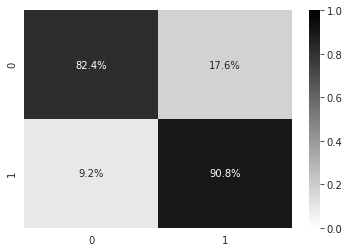

In [90]:
# Create a confusion matrix of recorded purchase vs. predicted
# Note : this CM represents all modeled data, including both train and test sets
cf_matrix = metrics.confusion_matrix(to_model.purchased.astype(int), to_model.prediction.astype(int), normalize = 'true')

# Visualize the matrix
sns.heatmap(cf_matrix, annot=True, fmt='.1%', cmap = 'binary', vmin = 0, vmax = 1)

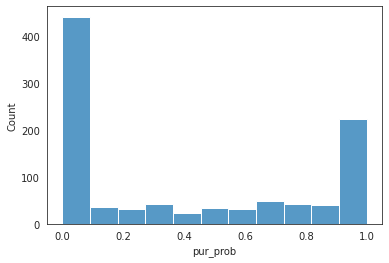

In [48]:
# Distribution of probabilities
sns.histplot(to_model.pur_prob)

# 5 Try Your Product Pitch

In [75]:
# Will people buy your product? 

def buy_or_not():
  '''Function to see if someone may buy your product based on your pitch'''
  
  your_pitch = [input('If you were to sell your product to someone, how would you describe it?: ')]

  pur_prob = my_pipe.predict_proba(your_pitch)[0][1]

  if pur_prob > 0.6:
    print("\n**", "Congrats, I probably will buy it!")
  elif pur_prob > 0.4:
    print("\n**", "I may or may not buy it")
  else:
    print("\n**", "Sorry, I probably won't buy it")

In [76]:
# Good pitch
buy_or_not()

If you were to sell your product to someone, how would you describe it?: Tastes great

** Congrats, I probably will buy it!


In [81]:
# Not so good pitch
buy_or_not()

If you were to sell your product to someone, how would you describe it?: We know not everyone loves it

** I may or may not buy it


# Appendix : Detours
*Some experiments that failed or not followed up when working on this project -- would be glad to receive ideas or feedback on whether these could have improved the modeling process or result*

## Check words
*Trying to see what types of words are mostly used in reviews, and see if they might be useful to predict purchase*

In [ ]:
# Import stop words and punctuations
from spacy.lang.en.stop_words import STOP_WORDS
import string
punctuations = string.punctuation

In [ ]:
from collections import Counter

adj_counter = Counter()
for token in reviews_doc:
    if token.pos_ == 'ADJ' and (token.lemma_ not in STOP_WORDS):
        adj_counter[token.lower_] += 1

adv_counter = Counter()
for token in reviews_doc:
    if token.pos_ == 'ADV' and (token.lemma_ not in STOP_WORDS):
        adv_counter[token.lower_] += 1

noun_counter = Counter()
for token in reviews_doc:
    if token.pos_ == 'NOUN' and (token.lemma_ not in STOP_WORDS):
        noun_counter[token.lower_] += 1

verb_counter = Counter()
for token in reviews_doc:
    if token.pos_ == 'VERB' and (token.lemma_ not in STOP_WORDS):
        verb_counter[token.lower_] += 1

intj_counter = Counter()
for token in reviews_doc:
    if token.pos_ == 'INTJ' and (token.lemma_ not in STOP_WORDS):
        intj_counter[token.lower_] += 1

In [ ]:
adj, adj_count = zip(*adj_counter.most_common(10))
adv, adv_count = zip(*adv_counter.most_common(10))
noun, noun_count = zip(*noun_counter.most_common(10))
verb, verb_count = zip(*verb_counter.most_common(10))
intj, intj_count = zip(*intj_counter.most_common(10))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'ADJECTIVES')

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'ADVERBS')

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'NOUNS')

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'VERBS')

<BarContainer object of 10 artists>

Text(0.5, 1.0, 'INTERJECTIONS')

<BarContainer object of 10 artists>

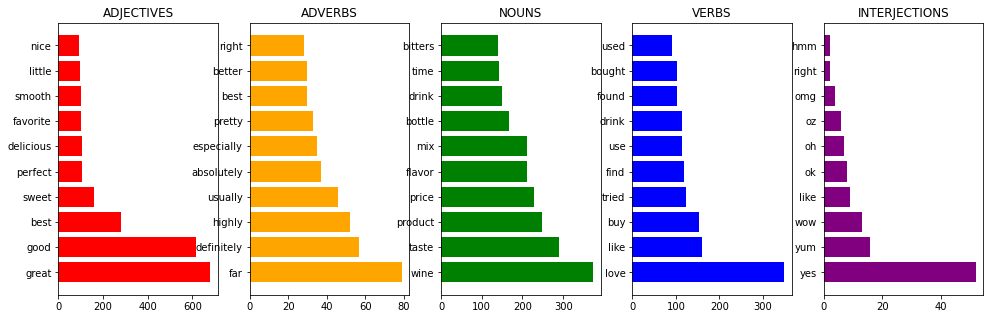

In [ ]:
fig, axes = plt.subplots(1,5, figsize=(20,5))

plt.subplot(161)
plt.title('ADJECTIVES')
plt.barh(width=adj_count, y=adj, color= 'red')

plt.subplot(162)
plt.title('ADVERBS')
plt.barh(width=adv_count, y=adv, color= 'orange')

plt.subplot(163)
plt.title('NOUNS')
plt.barh(width=noun_count, y=noun, color= 'green')

plt.subplot(164)
plt.title('VERBS')
plt.barh(width=verb_count, y=verb, color= 'blue')

plt.subplot(165)
plt.title('INTERJECTIONS')
plt.barh(width=intj_count, y=intj, color= 'purple')

## Check phrases
*I was considering to vectorize not just individual words, but meaningful phrases (instead of indiscriminate bigrams). In the end I decided against this as there may be too many unique phrases that only appear once in the data.*

In [88]:
small_list = [to_model.iloc[:20,0]]
small_list

[67    delicious : This wine is full-bodied and delic...
 68    Great wine for price : Super wine with fruity ...
 69    Not worth the money! : Had a taste of either b...
 70    Nice Red : This is our go-to wine for dinner p...
 76    It is the first drink I check everytime : The ...
 77       Yes I would buy again : Best Drink you can get
 78          very reasonally priced : to make manhattens
 79    One fine bourbon : Best bourbon I have found.....
 80    Red Stag stands alone : Red Stag and Coke Zero...
 81    Good taste : I like it with dr.peper to sip an...
 82    The only whiskey I drink : Better than the oth...
 83    Priced right and great quality : Drank it for ...
 84    Best bourbon on earth. : I keep Jim Beam on ha...
 85    A Bourbon Legend : I typically have this neat ...
 86    I would buy this drink over and over. : It's d...
 87    Smooth : I had a neat 2 finger glass two weeks...
 88    smoothy : Best tasteing and defenetly the smoo...
 89    Always in my liquor cabi

In [89]:
# Get spaCy Matcher
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

# Create patterns
pattern1 = [{"POS": "ADJ"}, {"POS": "NOUN"}]
pattern2 = [{"POS": "ADV"}, {"POS": "NOUN"}]
pattern3 = [{"POS": "ADJ"}, {"POS": "PROPN"}]
pattern4 = [{"POS": "ADV"}, {"POS": "PROPN"}]

# Add new patterns
matcher.add("ADJ_NOUN", None, pattern1)
matcher.add("ADV_NOUN", None, pattern2)
matcher.add("ADJ_PROPN", None, pattern3)
matcher.add("ADV_PROPN", None, pattern4)

In [90]:
# Get phrases with matcher
small_doc = nlp(str(small_list))
phrases = matcher(small_doc)

In [91]:
for match_id, start, end in phrases:
    phrase_span = small_doc[start:end]
    print(phrase_span.lower_)

great wine
super wine
first drink
fine bourbon
best bourbon
good taste
only whiskey
great quality
best bourbon
best tasteing
best price
mixed drink
great product
best whiskey


## Visualizing vectors
*I was curious how the vectors will look like. However reducing 1800+ features to two dimensions result in the visualization being all over the place*

In [31]:
# Check the vectors we have
vectors_summary

,Shape,Non-zeros,Sum
COUNT VECTORS,,,
train_boost_ctv,"(1098, 1881)",12460,14472
train_ctv,"(796, 1881)",9145,10464
test_ctv,"(199, 1881)",2023,2385
new_ctv,"(799, 1881)",11404,14159
TFIDF VECTORS,,,
train_boost_tfv,"(1098, 1881)",12460,3229.97
train_tfv,"(796, 1881)",9145,2362
test_tfv,"(199, 1881)",2023,555.535
new_tfv,"(799, 1881)",11404,2564.19


In [43]:
# Initiate TSNE for dimension reduction
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', random_state=20, perplexity=10)

In [44]:
train_ctv_tsne = tsne.fit_transform(train_ctv)
train_ctv_tsne.shape

(796, 2)

In [45]:
train_ctv_tsne

array([[ 16.521143 ,   9.021049 ],
       [  6.3968596,   1.3541888],
       [-54.9573   , -18.636875 ],
       ...,
       [ 62.267727 ,  10.171315 ],
       [ 17.449022 ,  21.354225 ],
       [-23.6984   , -14.597283 ]], dtype=float32)

In [46]:
train_ctv_tsne = np.c_[y_train, train_ctv_tsne]
train_ctv_tsne

array([[  0.        ,  16.52114296,   9.02104855],
       [  0.        ,   6.39685965,   1.3541888 ],
       [  0.        , -54.95729828, -18.63687515],
       ...,
       [  0.        ,  62.2677269 ,  10.17131519],
       [  0.        ,  17.44902229,  21.35422516],
       [  0.        , -23.6984005 , -14.59728336]])

In [47]:
train_ctv_obs = [int(observed) for observed in train_ctv_tsne[:, 0]]
train_ctv_dim1 = [float(x) for x in train_ctv_tsne[:, 1]]
train_ctv_dim2 = [float(y) for y in train_ctv_tsne[:, 2]]

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa4d24a5e10>)

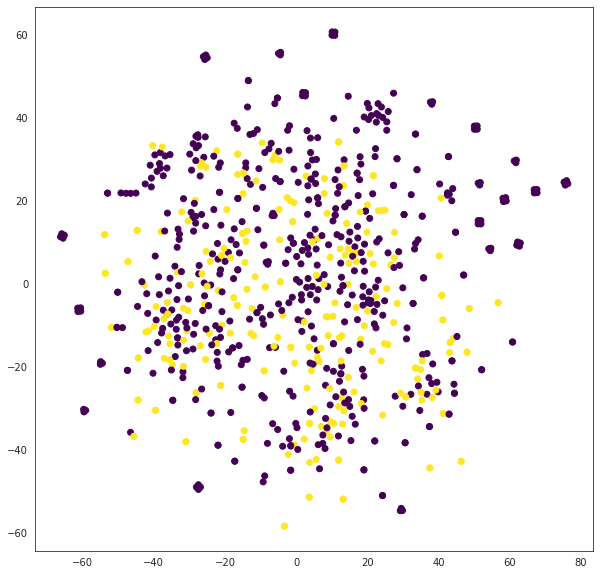

In [48]:
plt.subplots(1, 1, figsize=(10,10))

plt.subplot(111)
plt.scatter(train_ctv_dim1, train_ctv_dim2, c=train_ctv_obs, cmap='viridis')